<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/KNN_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Clustering](#scrollTo=QerrWnNI3zw8)

>>[KNN](#scrollTo=QerrWnNI3zw8)

>>>[KNN from scratch](#scrollTo=sI1IgqX3QxAv)

>>>[KNN decision boundary](#scrollTo=dhfHMP7fWo1w)

>>[Kmeans](#scrollTo=fwSK9C3r4duk)



# Clustering

关于聚类clustering，KNN和Kmeans是最重要的，我们要理解这两个算法，KNN是supervised algorithm， kmeans是unsupervised algorithm。

## KNN

K nearest neighbor. 我们要理解这个k是什么？这个k的意思是选择k个跟这个点最近的neighbors，也就是要计算距离，选择距离近的neighbors，然后看这些个neighbors中，属于哪一个类的neighbor更多，我们就assign这个新的新为哪一个类，所以在使用KNN时，我们一般会选择奇数，odd number为k的数值。所以呢，对k的选择是很重要的。

KNN的model里面呢，其实是没有training的过程的，我们的

clf.fit()

里面参与的过程就是内存分配，把数据存下来，没有进行训练的过程，因为不需要

这里我们来讲一下parameters
* model parameter: 这是模型的参数，有训练得到
* hyper paratemer: 这是我们人工设置的参数

KNN是一个no parametric model，意思就是它的模型是没有参数的，也就是没有训练的过程。KNN有个hyper parameter，也就是k的选择

这是一个非常简单的algorithm，非常容易理解

<img src="https://user-images.githubusercontent.com/68700549/147421587-d602eccd-c86e-4517-844e-500cfc787ab8.png"  width="600" height="300">

关于KNN我们要考虑的几个问题
* 把每一个数据表示成向量
  * 有一个步骤是很重要的，就是feature scaling
    * min-max normalization: $x_{new}=\frac{X-min(X)}{max(X)-min(X)}$, 会把值的范围project 到[0,1]
    * Z-score normalization: $X_{new}=\frac{X-mean(X)}{std(X)}$

* 每个数据的label
* 计算数据间的distance

  如果我们有两个点$x_1=(x_{11},x_{12},x_{13}),x_2=(x_{21},x_{22},x_{23})$
  * 一般是用Euclidean distance: $d=\sqrt{(x_{11}-x_{21})^2+(x_{12}-x_{22})^2+(x_{13}-x_{23})^2}$
  * 也有Manhattan distance: $d=|x_{11}-x_{21}|+|x_{12}-x_{22}|+|x_{13}-x_{23}|$

* 选择合适的k

  我们要去理解k对算法的影响。KNN的决策边界是怎样的？

我们来看一下Normalization和standardization的区别

| Normalization     | Standardization |
| ----------- | ----------- |
| Minimum and maximum value of features are used for scaling      | Mean and standard deviation is used for scaling.       |
| It is used when features are of different scales.   | It is used when we want to ensure zero mean and unit standard deviation.        |
| Scales values between [0, 1] or [-1, 1].   | It is not bounded to a certain range.        |
| It is really affected by outliers.   | It is much less affected by outliers.        |
| Scikit-Learn provides a transformer called MinMaxScaler for Normalization.   | Scikit-Learn provides a transformer called StandardScaler for standardization.        |
| It is useful when we don’t know about the distribution   | It is useful when the feature distribution is Normal or Gaussian.        |
| It is a often called as Scaling Normalization   | It is a often called as Z-Score Normalization.        |


### KNN from scratch

KNN算法的思想就是找到最相似的前k个数据，也就是计算距离，然后把在这k个数据中出现次数最多的那个类assign给新的数据, 它的过程如下
* feature scaling，因为要计算距离，所以，这一步很重要
* 计算test data 与 每个train data的距离
* sort
* select top k
* check the class frequency
* assign the class

In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [9]:
x = load_iris().data
y = load_iris().target

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [2]:
## calculate the distance
def euclidean_dist(point1, point2):
  return np.sqrt(sum((point1-point2)**2))

In [26]:
def knn_classifier(x, y, test_data, k):
  # calculate the distance
  dist = [euclidean_dist(x_train, test_data) for x_train in x]
  dist = np.argsort(dist)[:k]
  counter = Counter(y[dist])
  return counter.most_common()[0][0]


In [27]:
y_pred = [knn_classifier(x_train, y_train, test_data, 3) for test_data in x_test]
acc = accuracy_score(y_test, y_pred)
print("KNN acc is: ", acc)

KNN acc is:  1.0


### KNN decision boundary

我们要观察一下随着k值的变化，它的decision boundary会怎么变化，这样对k的选择会更加理解

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
import matplotlib.pyplot as plt

我们生成一些随机样本

In [47]:
n_points = 100
x1 = np.random.multivariate_normal([1,50],[[1,0],[0,10]], n_points)
x2 = np.random.multivariate_normal([2,50],[[1,0],[0,10]], n_points)
X = np.concatenate([x1, x2])
y = np.array([0]*n_points + [1]*n_points)
print(X.shape)
print(y.shape)

(200, 2)
(200,)


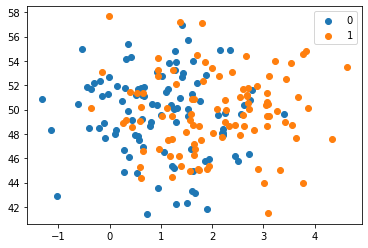

In [48]:
plt.scatter(x1[:, 0], x1[:, 1], label=str(0))
plt.scatter(x2[:, 0], x2[:, 1], label=str(1))
plt.legend()
plt.show()

We will visualize the decision boundary

In [54]:
clfs = []
neighbors = [1,3,5,9,11,13,15,19,21]
for i in range(len(neighbors)):
  clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X, y))

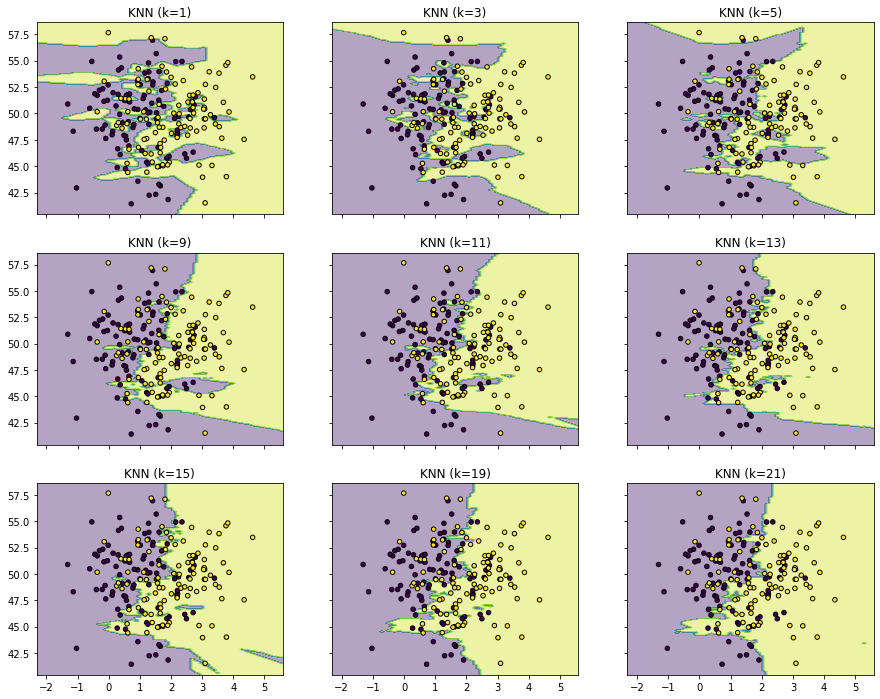

In [55]:
## Visualize it
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15,12))
for idx, clf, title in zip(product([0,1,2],[0,1,2]),
                           clfs,
                           ['KNN (k=%d)'%k for k in neighbors]):
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  ax[idx[0], idx[1]].contourf(xx, yy, z, alpha=0.4)
  ax[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  ax[idx[0], idx[1]].set_title(title)
plt.show()

我们可以观察到当k值选的较小的时候，有点overfitting了，就是边界很崎岖。当把k值选得稍微大点的时候，我们可观察到它的decision boundary是变得稍微光滑了。也就是说当k值较小，模型会变得复杂，容易overfitting，当k值过大，模型变得简单，容易underfitting，所以k值的选择很重要，一般用cross validation来选择k值。一般来说，$k≤\sqrt{n}$, n是样本数量

我们从scratch那里看到，我们需要计算跟每一个training data的距离O(n)，还要sort O(nlogn). 当training数据很大时，复杂度也会很大，面对大数据，应该怎么处理呢？

* KD-tree: 低维度的时候可以用
* Locality sensitivity hashing: 把样本分在不同的bucket，使得距离比较近较大概率在同一个bucket。这是一个近似算法，会适当损失精确率

## Kmeans